In [1]:
import numpy as np
import matplotlib.pylab as pl
import random
import pandas as pd

In [2]:
def Huber(X, y, W, sigma):
    '''Input: 
            X: training data, shape is (N, D+1), the extra one dimenstion is use to add bias, all equal to 1
            y: training data, shape is (N, 1)
            W: weight, shape is (D+1, 1), the extra one dimenstion is bias b
            sigma: a threshold use to penalize outliers
       Output:
            loss: scala
            dW: shape as W
    '''
    N, D = X.shape
    y_pred = X.dot(W)
    res = y - y_pred
    res_abs = np.abs(res)

    idx_l = np.argwhere(res_abs<=sigma)
    idx_g = np.argwhere(res_abs>sigma)

    loss = 0.5*np.sum(res[idx_l[:,0]]**2) + sigma * np.sum(res_abs[idx_g[:,0]] - 0.5*sigma)
    loss /= N
    
    dW = -X[idx_l[:,0]].T.dot(res[idx_l[:,0]]) - sigma * np.sum(X[idx_g[:,0]]*np.sign(res[idx_g[:,0]]), axis=0).reshape(-1,1)
    dW = 1./N * dW

    return loss, dW

def train_Huber(X, y, sigma, learning_rate, num_iters, batch_size, verbose=False):
    N, D = X.shape
    # initialize W
    W = 0.001 * np.random.randn(D, 1)
    # save loss 
    loss_history = []
    
    for it in range(num_iters):
        
        mask = np.random.choice(N, batch_size)
        X_batch = X[mask]
        y_batch = y[mask]
        
        loss, dW = Huber(X_batch, y_batch, W, sigma)
#         print loss.shape
        loss_history.append(float(loss))
        # update W
        W += - learning_rate*dW
        # verbose
        if verbose and it % 100 == 0:
            print 'iteration %d / %d: loss %f' % (it, num_iters, loss)
        
    return loss_history, W

In [3]:
def load_data(PATH):
    data =pd.read_excel(PATH)
    return np.asarray(data)

 check data

In [4]:
PATH = './car_data.xls'
data = pd.read_excel(PATH)
print data.head()
y = np.asarray(data['Price'])
print y.shape

          Price  Mileage   Make    Model      Trim   Type  Cylinder  Liter  \
0  17314.103129     8221  Buick  Century  Sedan 4D  Sedan         6    3.1   
1  17542.036083     9135  Buick  Century  Sedan 4D  Sedan         6    3.1   
2  16218.847862    13196  Buick  Century  Sedan 4D  Sedan         6    3.1   
3  16336.913140    16342  Buick  Century  Sedan 4D  Sedan         6    3.1   
4  16339.170324    19832  Buick  Century  Sedan 4D  Sedan         6    3.1   

   Doors  Cruise  Sound  Leather  
0      4       1      1        1  
1      4       1      1        0  
2      4       1      1        0  
3      4       1      0        0  
4      4       1      0        1  
(804,)


In [5]:
PATH = './car_data.xls'
data = load_data(PATH)
print data.shape
print data[0]

(804, 12)
[17314.103128901563 8221 u'Buick' u'Century' u'Sedan 4D' u'Sedan' 6 3.1 4
 1 1 1]


# Q1 Linear regression equation for Mileage vs Price.

In [235]:
X = data[:,1].reshape(-1,1).astype(np.float32)
y = data[:,0].reshape(-1,1).astype(np.float32)
print X.shape, y.shape

(804, 1) (804, 1)


In [236]:
# data rescale
X[:,0] /= 10000
# X = np.hstack((X, X[:,0].reshape(-1,1)**2, X[:,0].reshape(-1,1)**3))
y /= 10000
# y = np.log(y)
# add bias
X = np.hstack((X, np.ones((X.shape[0],1))))
print X.shape, y.shape

(804, 2) (804, 1)


In [237]:
sigma = 10
learning_rate = 2e-2
reg = 0
num_iters = 10000
batch_size = 800
loss_history, W = train_Huber(X, y, sigma, learning_rate, num_iters, batch_size, verbose=True)

iteration 0 / 10000: loss 2.691162
iteration 100 / 10000: loss 0.730046
iteration 200 / 10000: loss 0.563000
iteration 300 / 10000: loss 0.561155
iteration 400 / 10000: loss 0.565698
iteration 500 / 10000: loss 0.573461
iteration 600 / 10000: loss 0.478222
iteration 700 / 10000: loss 0.529110
iteration 800 / 10000: loss 0.468670
iteration 900 / 10000: loss 0.486967
iteration 1000 / 10000: loss 0.532160
iteration 1100 / 10000: loss 0.458508
iteration 1200 / 10000: loss 0.456320
iteration 1300 / 10000: loss 0.445672
iteration 1400 / 10000: loss 0.455869
iteration 1500 / 10000: loss 0.438331
iteration 1600 / 10000: loss 0.415575
iteration 1700 / 10000: loss 0.533407
iteration 1800 / 10000: loss 0.488558
iteration 1900 / 10000: loss 0.473009
iteration 2000 / 10000: loss 0.485797
iteration 2100 / 10000: loss 0.472625
iteration 2200 / 10000: loss 0.443557
iteration 2300 / 10000: loss 0.467808
iteration 2400 / 10000: loss 0.491975
iteration 2500 / 10000: loss 0.492078
iteration 2600 / 10000: 

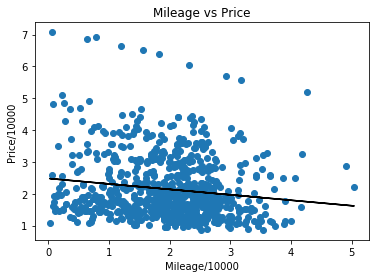

In [242]:
y_p = X.dot(W)
pl.plot(X[:,0], y, 'o')
pl.plot(X[:,0], y_p, 'k-')
plt.ylabel('Price/10000')
plt.xlabel('Mileage/10000')
plt.title('Mileage vs Price')
pl.show()

In [239]:
print W

[[-0.17135103]
 [ 2.481193  ]]


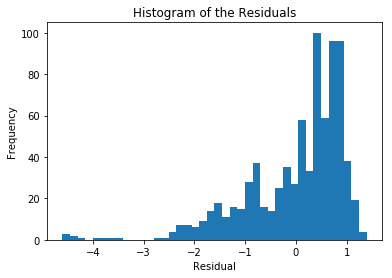

In [243]:
res = y_p - y
import matplotlib.pyplot as plt
plt.hist(res,40)
plt.ylabel('Frequency')
plt.xlabel('Residual')
plt.title('Histogram of the Residuals')
plt.show()

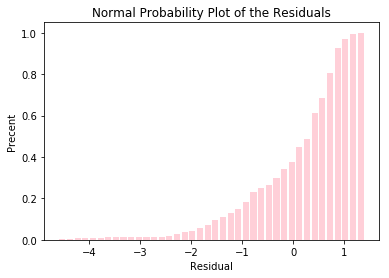

In [244]:
plt.hist(res,40,normed=1,histtype='bar',facecolor='pink',alpha=0.75,cumulative=True,rwidth=0.8)
plt.ylabel('Precent')
plt.xlabel('Residual')
plt.title('Normal Probability Plot of the Residuals')
plt.show()

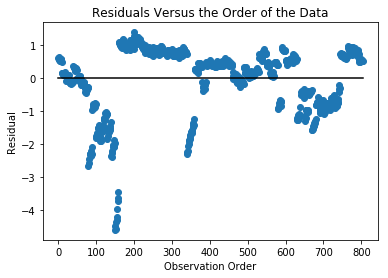

In [245]:
pl.plot(range(X.shape[0]), res, 'o')
pl.xlabel('Observation Order')
pl.ylabel('Residual')
pl.title('Residuals Versus the Order of the Data')
pl.plot(range(X.shape[0]), np.zeros(X.shape[0]), 'k-')
pl.show()

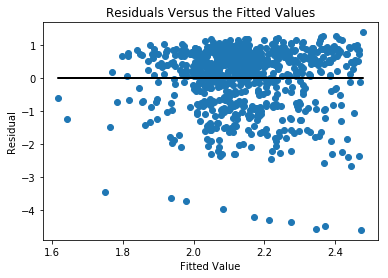

In [246]:
pl.plot(y_p, res, 'o')
pl.xlabel('Fitted Value')
pl.ylabel('Residual')
pl.title('Residuals Versus the Fitted Values')
pl.plot(y_p, np.zeros(y_p.shape[0]), 'k-')
pl.show()

# Calculate the R-square: $R^2 = 0.02$

In [247]:
from sklearn.metrics import r2_score
r2 = r2_score(y.reshape(-1), y_p.reshape(-1))
print r2

0.020411491400423754


# Question 2

In [249]:
# get col indices 0 as y, get col indices 1 and [6, 12) as X
X = data[:, list([1,6,7,8,9,10,11])]
# add bias
X = np.hstack((X, np.ones((X.shape[0], 1)))).astype(np.float32)
print X.dtype
y = data[:, 0].reshape(-1,1).astype(np.float32)
print y.dtype
print X.shape, y.shape

float32
float32
(804, 8) (804, 1)


In [250]:
# rescale data
X[:,0] /= 10000
y[:, 0] /= 10000
# y = np.log(y)

In [251]:
sigma = 10
learning_rate = 3e-2
reg = 1e-5
num_iters = 4000
batch_size = 800
loss_history, W = train_Huber(X, y, sigma, learning_rate, num_iters, batch_size, verbose=True)

iteration 0 / 4000: loss 2.721946
iteration 100 / 4000: loss 0.303123
iteration 200 / 4000: loss 0.287094
iteration 300 / 4000: loss 0.253623
iteration 400 / 4000: loss 0.248468
iteration 500 / 4000: loss 0.313401
iteration 600 / 4000: loss 0.246438
iteration 700 / 4000: loss 0.266806
iteration 800 / 4000: loss 0.282946
iteration 900 / 4000: loss 0.269303
iteration 1000 / 4000: loss 0.250888
iteration 1100 / 4000: loss 0.271055
iteration 1200 / 4000: loss 0.283274
iteration 1300 / 4000: loss 0.298853
iteration 1400 / 4000: loss 0.259695
iteration 1500 / 4000: loss 0.294659
iteration 1600 / 4000: loss 0.291354
iteration 1700 / 4000: loss 0.278741
iteration 1800 / 4000: loss 0.271743
iteration 1900 / 4000: loss 0.260856
iteration 2000 / 4000: loss 0.260670
iteration 2100 / 4000: loss 0.281911
iteration 2200 / 4000: loss 0.297723
iteration 2300 / 4000: loss 0.270912
iteration 2400 / 4000: loss 0.287141
iteration 2500 / 4000: loss 0.282700
iteration 2600 / 4000: loss 0.245978
iteration 270

In [253]:
y_p = X.dot(W)
print W

[[-0.16781255]
 [ 0.39002829]
 [-0.09802136]
 [-0.15275634]
 [ 0.62892578]
 [-0.19255436]
 [ 0.33871536]
 [ 0.60969634]]


In [254]:
from sklearn.metrics import r2_score
r2 = r2_score(y.reshape(-1), y_p.reshape(-1))
print r2

0.44347162322695644


# $R^2 = 0.443$

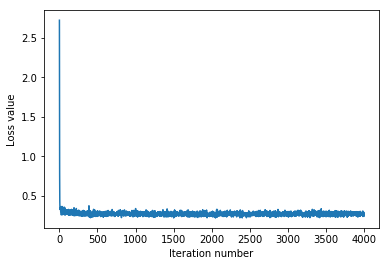

In [255]:
import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

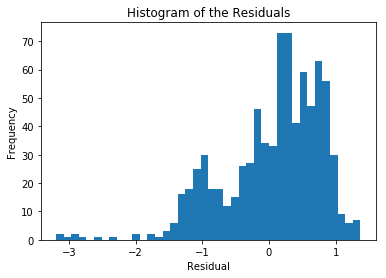

In [230]:
res = y_p - y
import matplotlib.pyplot as plt
plt.hist(res,40)
plt.ylabel('Frequency')
plt.xlabel('Residual')
plt.title('Histogram of the Residuals')
plt.show()

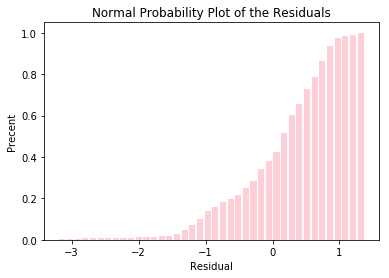

In [231]:
plt.hist(res,40,normed=1,histtype='bar',facecolor='pink',alpha=0.75,cumulative=True,rwidth=0.8)
plt.ylabel('Precent')
plt.xlabel('Residual')
plt.title('Normal Probability Plot of the Residuals')
plt.show()

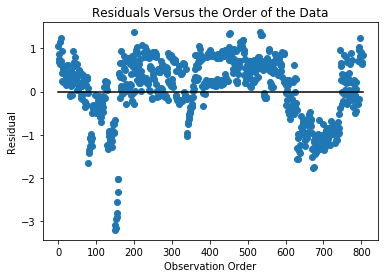

In [232]:
pl.plot(range(X.shape[0]), res, 'o')
pl.xlabel('Observation Order')
pl.ylabel('Residual')
pl.title('Residuals Versus the Order of the Data')
pl.plot(range(X.shape[0]), np.zeros(X.shape[0]), 'k-')
pl.show()

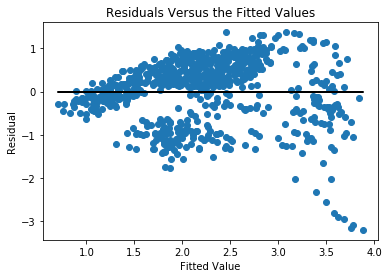

In [233]:
pl.plot(y_p, res, 'o')
pl.xlabel('Fitted Value')
pl.ylabel('Residual')
pl.title('Residuals Versus the Fitted Values')
pl.plot(y_p, np.zeros(y_p.shape[0]), 'k-')
pl.show()

# Q3 combination

In [2]:
PATH = './car_data.xls'
df = pd.read_excel(PATH)
print df.head()
# print df[0]
dummies_make = pd.get_dummies(df['Make'])
df = pd.concat([df, dummies_make], axis=1)
# df = df.drop(['Make'], inplace=True, axis=1)
print df.shape
dummies_type = pd.get_dummies(df['Type'])
df = pd.concat([df, dummies_type], axis=1)
dummies_model = pd.get_dummies(df['Model'])
df = pd.concat([df, dummies_model], axis=1)
dummies_trim = pd.get_dummies(df['Trim'])
df = pd.concat([df, dummies_trim], axis=1)

          Price  Mileage   Make    Model      Trim   Type  Cylinder  Liter  \
0  17314.103129     8221  Buick  Century  Sedan 4D  Sedan         6    3.1   
1  17542.036083     9135  Buick  Century  Sedan 4D  Sedan         6    3.1   
2  16218.847862    13196  Buick  Century  Sedan 4D  Sedan         6    3.1   
3  16336.913140    16342  Buick  Century  Sedan 4D  Sedan         6    3.1   
4  16339.170324    19832  Buick  Century  Sedan 4D  Sedan         6    3.1   

   Doors  Cruise  Sound  Leather  
0      4       1      1        1  
1      4       1      1        0  
2      4       1      1        0  
3      4       1      0        0  
4      4       1      0        1  
(804, 18)


In [3]:
print df.shape
print df.head()

(804, 102)
          Price  Mileage   Make    Model      Trim   Type  Cylinder  Liter  \
0  17314.103129     8221  Buick  Century  Sedan 4D  Sedan         6    3.1   
1  17542.036083     9135  Buick  Century  Sedan 4D  Sedan         6    3.1   
2  16218.847862    13196  Buick  Century  Sedan 4D  Sedan         6    3.1   
3  16336.913140    16342  Buick  Century  Sedan 4D  Sedan         6    3.1   
4  16339.170324    19832  Buick  Century  Sedan 4D  Sedan         6    3.1   

   Doors  Cruise      ...        Quad Coupe 2D  SE Sedan 4D  SLE Sedan 4D  \
0      4       1      ...                    0            0             0   
1      4       1      ...                    0            0             0   
2      4       1      ...                    0            0             0   
3      4       1      ...                    0            0             0   
4      4       1      ...                    0            0             0   

   SS Coupe 2D  SS Sedan 4D  SVM Hatchback 4D  SVM Sedan 

In [4]:
data = np.asarray(df)
print data.shape
X = data[:,1].astype(np.float32).reshape(-1,1)
X = np.hstack((X, np.asarray(data[:, 6:]).astype(np.float32)))
print X.shape
y = np.asarray(data[:, 0]).astype(np.float32).reshape(-1,1)
print y.shape

(804, 102)
(804, 97)
(804, 1)


In [5]:
# rescale y
X = np.hstack((X, np.ones((X.shape[0], 1))))
y = np.log(y)

In [6]:
W = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
y_p = X.dot(W)
from sklearn.metrics import r2_score
r2 = r2_score(y.reshape(-1), y_p.reshape(-1))
print r2

0.9966476010849292


In [18]:
idx = np.argwhere(np.abs(W)>1e-6)
print W[idx[:,0]].shape

(98, 1)


### The best R-square  0.997, but it maybe overfitting

In [554]:
para = ['Mileage', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Convertible', 'Hatchback', 'Sedan']
for i , name in enumerate(para):
    if i == 0:
        X = np.asarray(df[name]).reshape(-1,1)
        continue
    X = np.hstack((X, np.asarray(df[name]).reshape(-1,1)))
print X.shape

(804, 14)


In [555]:
y = np.asarray(df['Price']).reshape(-1,1).astype(np.float32)
print y.shape
X = np.hstack((X, np.ones((X.shape[0], 1)))).astype(np.float32)
print X.shape

(804, 1)
(804, 15)


In [543]:
# rescale X[0] and y
# X[0] /= 10000
# y /= 10000
y = np.log(y)

# $$min ||XW - y||_2$$  
# $$W = (X^TX)^{\dagger}X^Ty$$

In [544]:
W = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)

In [559]:
for i , name in enumerate(para):
    print name + ' :    '+str(float(W[i,:]))

Mileage :    -8.23440859676e-06
Liter :    0.220488652587
Doors :    0.0772117525339
Cruise :    0.0173087120056
Sound :    0.0120210945606
Leather :    0.0144181549549
Buick :    0.095931917429
Cadillac :    0.536603748798
Chevrolet :    -0.0306390821934
Pontiac :    -0.000955760478973
SAAB :    0.647230684757
Convertible :    0.317374199629
Hatchback :    -0.204939588904
Sedan :    -0.16384164989


In [546]:
y_p = X.dot(W)
from sklearn.metrics import r2_score
r2 = r2_score(y.reshape(-1), y_p.reshape(-1))
print r2

0.9520032252054929


# $R^2 = 0.952$

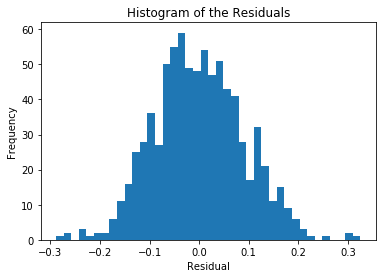

In [547]:
res = y_p - y
import matplotlib.pyplot as plt
plt.hist(res,40)
plt.ylabel('Frequency')
plt.xlabel('Residual')
plt.title('Histogram of the Residuals')
plt.show()

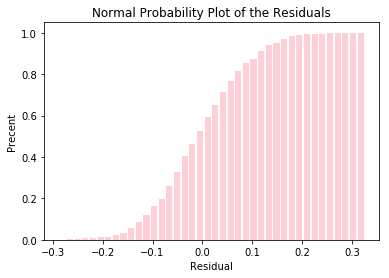

In [548]:
plt.hist(res,40,normed=1,histtype='bar',facecolor='pink',alpha=0.75,cumulative=True,rwidth=0.8)
plt.ylabel('Precent')
plt.xlabel('Residual')
plt.title('Normal Probability Plot of the Residuals')
plt.show()

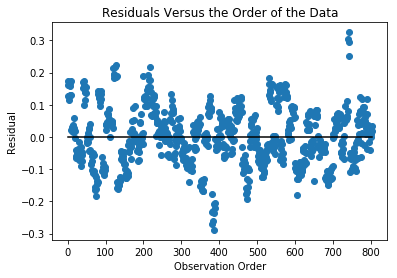

In [549]:
pl.plot(range(X.shape[0]), res, 'o')
pl.xlabel('Observation Order')
pl.ylabel('Residual')
pl.title('Residuals Versus the Order of the Data')
pl.plot(range(X.shape[0]), np.zeros(X.shape[0]), 'k-')
pl.show()

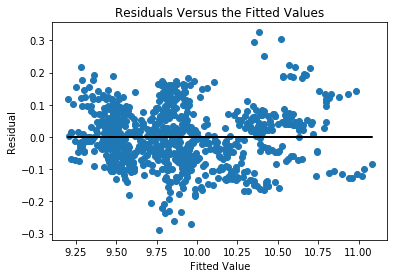

In [550]:
pl.plot(y_p, res, 'o')
pl.xlabel('Fitted Value')
pl.ylabel('Residual')
pl.title('Residuals Versus the Fitted Values')
pl.plot(y_p, np.zeros(y_p.shape[0]), 'k-')
pl.show()

In [551]:
print W/np.log(10)

[[-3.5761582e-06]
 [ 9.5757000e-02]
 [ 3.3532638e-02]
 [ 7.5170780e-03]
 [ 5.2206949e-03]
 [ 6.2617250e-03]
 [ 4.1662700e-02]
 [ 2.3304404e-01]
 [-1.3306384e-02]
 [-4.1508151e-04]
 [ 2.8108871e-01]
 [ 1.3783386e-01]
 [-8.9004129e-02]
 [-7.1155526e-02]
 [ 3.9180944e+00]]
